In [77]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns
import chardet
# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

In [78]:
train_path = '../data/interim/train_data_with_school_distance.csv'
test_path = '../data/interim/test_data_with_school_distance.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

df_train['is_test'] = 0
df_test['is_test'] = 1
df_all = pd.concat([df_train, df_test])

display(df_train)
display(df_test)
display(df_all)

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,bus_min_dist,sub_min_dist,한강거리,소비자전세물가지수,소비자월세물가지수,총인구수,연GDP,기준금리,dist_to_nearest_school,is_test
0,계단식,개별난방,79.97,8,3,1987,127.057210,37.476763,개포6차우성,201712,...,0.061783,1.129775,4.714059,96.34,100.19,561052,41374,1.50,0.425268,0
1,계단식,개별난방,79.97,22,4,1987,127.057210,37.476763,개포6차우성,201712,...,0.061783,1.129775,4.714059,96.34,100.19,561052,41374,1.50,0.425268,0
2,계단식,개별난방,54.98,28,5,1987,127.057210,37.476763,개포6차우성,201712,...,0.061783,1.129775,4.714059,96.34,100.19,561052,41374,1.50,0.425268,0
3,계단식,개별난방,79.97,3,4,1987,127.057210,37.476763,개포6차우성,201801,...,0.061783,1.129775,4.714059,98.36,99.76,547453,43664,1.50,0.425268,0
4,계단식,개별난방,79.97,8,2,1987,127.057210,37.476763,개포6차우성,201801,...,0.061783,1.129775,4.714059,98.36,99.76,547453,43664,1.50,0.425268,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118817,혼합식,개별난방,59.94,12,11,1998,126.905638,37.612962,갈현현대,200707,...,0.141061,0.509011,8.744236,76.21,84.66,463473,26478,4.75,0.330133,0
1118818,혼합식,개별난방,59.94,25,10,1998,126.905638,37.612962,갈현현대,200708,...,0.141061,0.509011,8.744236,76.21,84.66,463473,26478,5.00,0.330133,0
1118819,혼합식,개별난방,84.83,31,20,1998,126.905638,37.612962,갈현현대,200708,...,0.043369,0.423304,8.744236,76.21,84.66,463473,26478,5.00,0.330133,0
1118820,혼합식,개별난방,84.83,15,8,1998,126.905638,37.612962,갈현현대,200709,...,0.090750,0.472486,8.744236,76.21,84.66,463473,26478,5.00,0.330133,0


,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,bus_min_dist,sub_min_dist,한강거리,소비자전세물가지수,소비자월세물가지수,총인구수,연GDP,기준금리,dist_to_nearest_school,is_test
0,계단식,개별난방,79.9700,26,5,1987,127.057210,37.476763,개포6차우성,202307,...,0.061783,1.129775,4.714059,104.66,102.66,534103,51919,3.5,0.425268,1
1,계단식,지역난방,108.2017,15,10,2021,127.056394,37.484892,개포더샵트리에,202308,...,0.098282,0.413746,3.810155,104.66,102.66,534103,51919,3.5,0.142229,1
2,혼합식,지역난방,161.0000,28,15,1984,127.055990,37.483894,개포우성3차,202307,...,0.098282,0.413746,3.921117,104.66,102.66,534103,51919,3.5,0.251399,1
3,혼합식,지역난방,133.4600,10,14,1984,127.055990,37.483894,개포우성3차,202308,...,0.098282,0.413746,3.921117,104.66,102.66,534103,51919,3.5,0.251399,1
4,혼합식,지역난방,104.4300,18,6,1984,127.055990,37.483894,개포우성3차,202308,...,0.131192,0.221601,3.921117,104.66,102.66,534103,51919,3.5,0.251399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,혼합식,개별난방,84.6500,19,13,2014,127.106720,37.618870,신내우디안1단지,202307,...,0.053753,0.203699,11.087507,104.66,102.66,390140,51919,3.5,0.417560,1
9268,혼합식,개별난방,84.6200,25,12,2014,127.106720,37.618870,신내우디안1단지,202307,...,0.053753,0.203699,11.087507,104.66,102.66,390140,51919,3.5,0.417560,1
9269,혼합식,개별난방,101.6500,27,12,2014,127.106720,37.618870,신내우디안1단지,202308,...,0.053753,0.203699,11.087507,104.66,102.66,390140,51919,3.5,0.417560,1
9270,혼합식,개별난방,84.9400,2,18,2014,127.106720,37.618870,신내우디안1단지,202309,...,0.053753,0.203699,11.087507,104.66,102.66,390140,51919,3.5,0.417560,1


,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,bus_min_dist,sub_min_dist,한강거리,소비자전세물가지수,소비자월세물가지수,총인구수,연GDP,기준금리,dist_to_nearest_school,is_test
0,계단식,개별난방,79.97,8,3,1987,127.05721,37.476763,개포6차우성,201712,...,0.061783,1.129775,4.714059,96.34,100.19,561052,41374,1.5,0.425268,0
1,계단식,개별난방,79.97,22,4,1987,127.05721,37.476763,개포6차우성,201712,...,0.061783,1.129775,4.714059,96.34,100.19,561052,41374,1.5,0.425268,0
2,계단식,개별난방,54.98,28,5,1987,127.05721,37.476763,개포6차우성,201712,...,0.061783,1.129775,4.714059,96.34,100.19,561052,41374,1.5,0.425268,0
3,계단식,개별난방,79.97,3,4,1987,127.05721,37.476763,개포6차우성,201801,...,0.061783,1.129775,4.714059,98.36,99.76,547453,43664,1.5,0.425268,0
4,계단식,개별난방,79.97,8,2,1987,127.05721,37.476763,개포6차우성,201801,...,0.061783,1.129775,4.714059,98.36,99.76,547453,43664,1.5,0.425268,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,혼합식,개별난방,84.65,19,13,2014,127.10672,37.618870,신내우디안1단지,202307,...,0.053753,0.203699,11.087507,104.66,102.66,390140,51919,3.5,0.417560,1
9268,혼합식,개별난방,84.62,25,12,2014,127.10672,37.618870,신내우디안1단지,202307,...,0.053753,0.203699,11.087507,104.66,102.66,390140,51919,3.5,0.417560,1
9269,혼합식,개별난방,101.65,27,12,2014,127.10672,37.618870,신내우디안1단지,202308,...,0.053753,0.203699,11.087507,104.66,102.66,390140,51919,3.5,0.417560,1
9270,혼합식,개별난방,84.94,2,18,2014,127.10672,37.618870,신내우디안1단지,202309,...,0.053753,0.203699,11.087507,104.66,102.66,390140,51919,3.5,0.417560,1


In [79]:
train_path = '../data/interim/train_final_ver1.csv'
test_path = '../data/interim/test_final_ver1.csv'

df_org = pd.read_csv(train_path, index_col=0)
df_org_test = pd.read_csv(test_path, index_col=0)

df_org['is_test'] = 0
df_org_test['is_test'] = 1
df_org_all = pd.concat([df_org, df_org_test])

display(df_org)
display(df_org_test)
display(df_org_all)

,복도유형,난방방식,시군구,전용면적,계약일,층,건축년도,k-전체동수,k-전체세대수,k-연면적,건축면적,x,y,target,아파트명,계약년월,도로명,is_test
0,계단식,개별난방,서울특별시 강남구 개포동,79.97,8,3,1987,8.0,270.0,22637.0,4858.0,127.057210,37.476763,124000,개포6차우성,201712,언주로 3,0
1,계단식,개별난방,서울특별시 강남구 개포동,79.97,22,4,1987,8.0,270.0,22637.0,4858.0,127.057210,37.476763,123500,개포6차우성,201712,언주로 3,0
2,계단식,개별난방,서울특별시 강남구 개포동,54.98,28,5,1987,8.0,270.0,22637.0,4858.0,127.057210,37.476763,91500,개포6차우성,201712,언주로 3,0
3,계단식,개별난방,서울특별시 강남구 개포동,79.97,3,4,1987,8.0,270.0,22637.0,4858.0,127.057210,37.476763,130000,개포6차우성,201801,언주로 3,0
4,계단식,개별난방,서울특별시 강남구 개포동,79.97,8,2,1987,8.0,270.0,22637.0,4858.0,127.057210,37.476763,117000,개포6차우성,201801,언주로 3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118817,혼합식,개별난방,서울특별시 은평구 구산동,59.94,12,11,1998,4.0,366.0,45515.0,0.0,126.905638,37.612962,20000,갈현현대,200707,서오릉로21길 36,0
1118818,혼합식,개별난방,서울특별시 은평구 구산동,59.94,25,10,1998,4.0,366.0,45515.0,0.0,126.905638,37.612962,20000,갈현현대,200708,서오릉로21길 36,0
1118819,혼합식,개별난방,서울특별시 은평구 구산동,84.83,31,20,1998,4.0,366.0,45515.0,0.0,126.905638,37.612962,28000,갈현현대,200708,서오릉로21길 36,0
1118820,혼합식,개별난방,서울특별시 은평구 구산동,84.83,15,8,1998,4.0,366.0,45515.0,0.0,126.905638,37.612962,29000,갈현현대,200709,서오릉로21길 36,0


,복도유형,난방방식,시군구,전용면적,계약일,층,건축년도,k-전체동수,k-전체세대수,k-연면적,건축면적,x,y,아파트명,계약년월,도로명,is_test
0,계단식,개별난방,서울특별시 강남구 개포동,79.9700,26,5,1987,8.0,270.0,22637.0,4858.00,127.057210,37.476763,개포6차우성,202307,언주로 3,1
1,계단식,지역난방,서울특별시 강남구 개포동,108.2017,15,10,2021,2.0,232.0,44951.0,2724.46,127.056394,37.484892,개포더샵트리에,202308,개포로 311,1
2,혼합식,지역난방,서울특별시 강남구 개포동,161.0000,28,15,1984,5.0,405.0,63304.0,61064.24,127.055990,37.483894,개포우성3차,202307,개포로 307,1
3,혼합식,지역난방,서울특별시 강남구 개포동,133.4600,10,14,1984,5.0,405.0,63304.0,61064.24,127.055990,37.483894,개포우성3차,202308,개포로 307,1
4,혼합식,지역난방,서울특별시 강남구 개포동,104.4300,18,6,1984,5.0,405.0,63304.0,61064.24,127.055990,37.483894,개포우성3차,202308,개포로 307,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,혼합식,개별난방,서울특별시 중랑구 신내동,84.6500,19,13,2014,16.0,1402.0,190866.0,14171.00,127.106720,37.618870,신내우디안1단지,202307,신내역로1길 85,1
9268,혼합식,개별난방,서울특별시 중랑구 신내동,84.6200,25,12,2014,16.0,1402.0,190866.0,14171.00,127.106720,37.618870,신내우디안1단지,202307,신내역로1길 85,1
9269,혼합식,개별난방,서울특별시 중랑구 신내동,101.6500,27,12,2014,16.0,1402.0,190866.0,14171.00,127.106720,37.618870,신내우디안1단지,202308,신내역로1길 85,1
9270,혼합식,개별난방,서울특별시 중랑구 신내동,84.9400,2,18,2014,16.0,1402.0,190866.0,14171.00,127.106720,37.618870,신내우디안1단지,202309,신내역로1길 85,1


,복도유형,난방방식,시군구,전용면적,계약일,층,건축년도,k-전체동수,k-전체세대수,k-연면적,건축면적,x,y,target,아파트명,계약년월,도로명,is_test
0,계단식,개별난방,서울특별시 강남구 개포동,79.97,8,3,1987,8.0,270.0,22637.0,4858.0,127.05721,37.476763,124000.0,개포6차우성,201712,언주로 3,0
1,계단식,개별난방,서울특별시 강남구 개포동,79.97,22,4,1987,8.0,270.0,22637.0,4858.0,127.05721,37.476763,123500.0,개포6차우성,201712,언주로 3,0
2,계단식,개별난방,서울특별시 강남구 개포동,54.98,28,5,1987,8.0,270.0,22637.0,4858.0,127.05721,37.476763,91500.0,개포6차우성,201712,언주로 3,0
3,계단식,개별난방,서울특별시 강남구 개포동,79.97,3,4,1987,8.0,270.0,22637.0,4858.0,127.05721,37.476763,130000.0,개포6차우성,201801,언주로 3,0
4,계단식,개별난방,서울특별시 강남구 개포동,79.97,8,2,1987,8.0,270.0,22637.0,4858.0,127.05721,37.476763,117000.0,개포6차우성,201801,언주로 3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,혼합식,개별난방,서울특별시 중랑구 신내동,84.65,19,13,2014,16.0,1402.0,190866.0,14171.0,127.10672,37.618870,NaN,신내우디안1단지,202307,신내역로1길 85,1
9268,혼합식,개별난방,서울특별시 중랑구 신내동,84.62,25,12,2014,16.0,1402.0,190866.0,14171.0,127.10672,37.618870,NaN,신내우디안1단지,202307,신내역로1길 85,1
9269,혼합식,개별난방,서울특별시 중랑구 신내동,101.65,27,12,2014,16.0,1402.0,190866.0,14171.0,127.10672,37.618870,NaN,신내우디안1단지,202308,신내역로1길 85,1
9270,혼합식,개별난방,서울특별시 중랑구 신내동,84.94,2,18,2014,16.0,1402.0,190866.0,14171.0,127.10672,37.618870,NaN,신내우디안1단지,202309,신내역로1길 85,1


In [80]:
df_org_all.loc[(df_org_all['아파트명'] == '삼성') & (df_org_all['x'] < 1), 'x'] = 126.9788
df_org_all.loc[(df_org_all['아파트명'] == '삼성') & (df_org_all['y'] < 1), 'y'] = 37.6133

display(df_org_all.describe())

,전용면적,계약일,층,건축년도,k-전체동수,k-전체세대수,k-연면적,건축면적,x,y,target,계약년월,is_test
count,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,250887.000000,251969.000000,2.519690e+05,2.518150e+05,1.128094e+06,1.128094e+06,1.118822e+06,1.128094e+06,1.128094e+06
mean,7.716028e+01,1.579966e+01,8.881412e+00,1.998791e+03,14.810871,1186.767436,1.619010e+05,1.904915e+05,1.269984e+02,3.755560e+01,5.799153e+04,2.014829e+05,8.219173e-03
std,2.936448e+01,8.722162e+00,5.989302e+00,9.358540e+00,17.682771,1197.452046,1.843113e+05,1.735029e+06,9.067939e-02,5.680886e-02,4.642602e+04,4.237691e+02,9.028635e-02
min,1.002000e+01,1.000000e+00,-4.000000e+00,1.961000e+03,1.000000,59.000000,0.000000e+00,0.000000e+00,1.267983e+02,3.743440e+01,3.500000e+02,2.007010e+05,0.000000e+00
25%,5.965000e+01,8.000000e+00,4.000000e+00,1.992000e+03,5.000000,405.000000,5.366600e+04,0.000000e+00,1.269175e+02,3.750840e+01,3.050000e+04,2.011110e+05,0.000000e+00
50%,8.187000e+01,1.600000e+01,8.000000e+00,2.000000e+03,10.000000,768.000000,1.026240e+05,1.735000e+03,1.270199e+02,3.754750e+01,4.480000e+04,2.015080e+05,0.000000e+00
75%,8.496000e+01,2.300000e+01,1.200000e+01,2.005000e+03,17.000000,1622.000000,2.039040e+05,8.414210e+03,1.270675e+02,3.760077e+01,6.980000e+04,2.018050e+05,0.000000e+00
max,4.243200e+02,3.100000e+01,6.900000e+01,2.023000e+03,124.000000,9510.000000,9.591851e+06,3.159620e+07,1.271800e+02,3.768929e+01,1.450000e+06,2.023090e+05,1.000000e+00


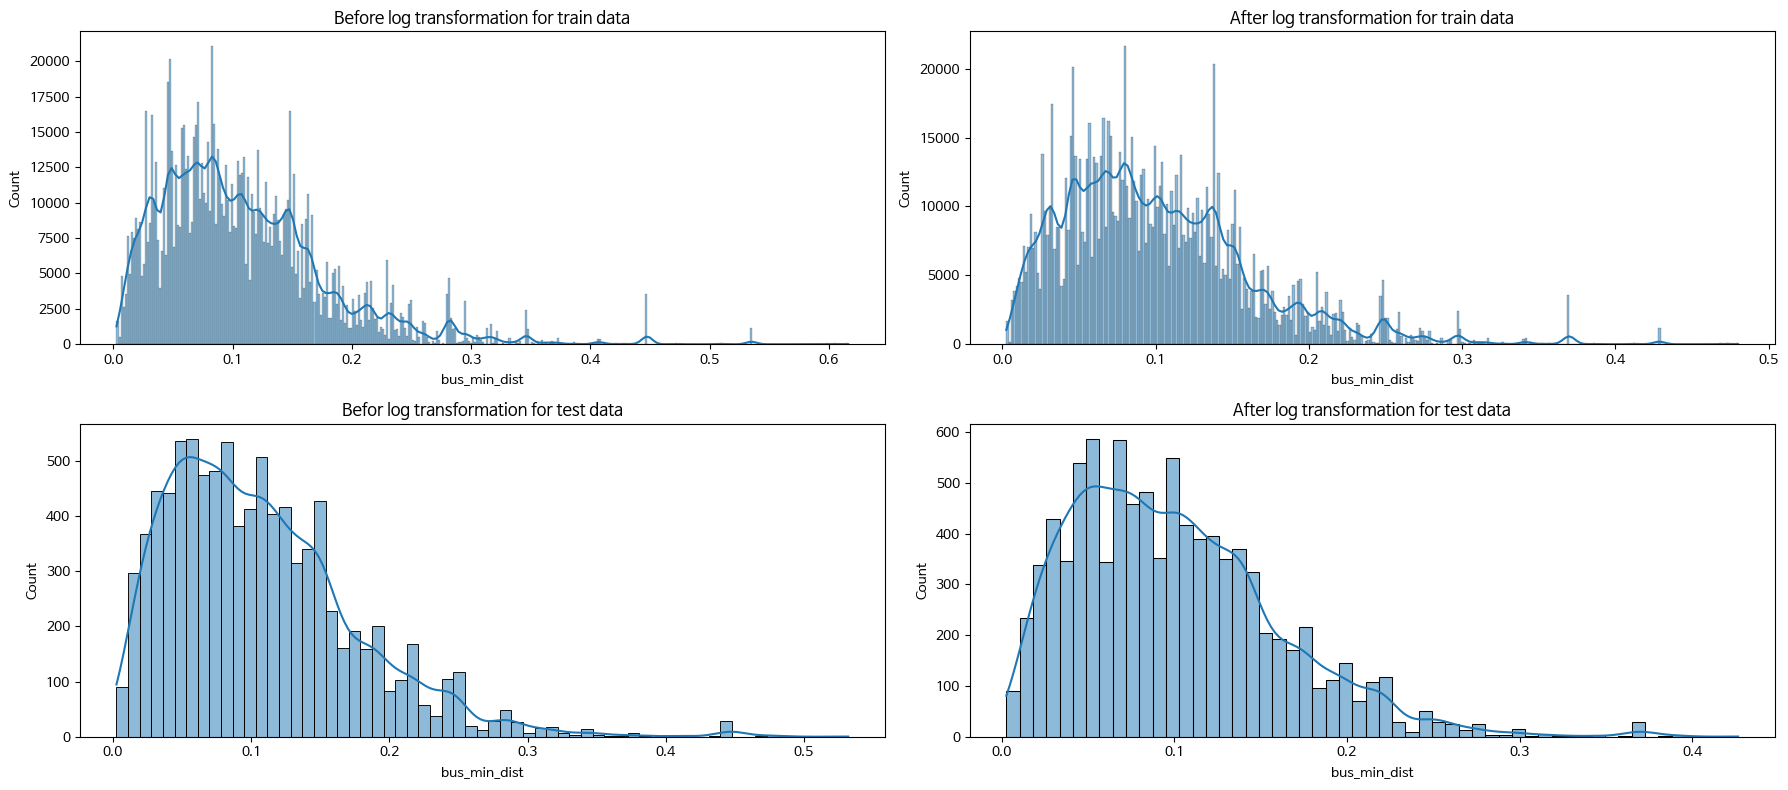

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8))
sns.histplot(data=df_train, x='bus_min_dist', kde=True, ax=axes[0,0])
axes[0, 0].set_title('Before log transformation for train data')
sns.histplot(data=df_train, x=np.log1p(df_train['bus_min_dist']), kde=True, ax=axes[0, 1])
axes[0, 1].set_title('After log transformation for train data')

sns.histplot(data=df_test, x='bus_min_dist', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Befor log transformation for test data')
sns.histplot(data=df_test, x=np.log1p(df_test['bus_min_dist']), kde=True, ax=axes[1, 1])
axes[1, 1].set_title('After log transformation for test data')

plt.tight_layout()
plt.show()

## 역세권이란?
    - 역을 중심으로 다양한 상업 및 업무활동이 이루어지는 세력권을 의미하며, 역을 이용하는 주민의 거주지, 상업지, 교육시설의 범위를 나타낸다.

    - 「역세권의 개발 및 이용에 관한 법률」 에 의한 역세권은 철도역과 인근의 철도시설 및 그 주변지역 중 국토교통부장관이 지정한 지역을 말한다. 역세권의 범위에 대해서는 구체적으로 정의되어 있지 않으나 보통 철도(지하철)를 중심으로 500m 반경(半徑) 내외의 지역을 의미한다.
    
    - 그 외에도 역까지의 경로와 실태, 다른 교통수단과의 관계, 역의 시설 등을 고려해야 한다.

## 1. 반경 500m, 1km, 1.5km, 2km 이내에 버스정류장이 몇 개 있는지에 대한 피쳐 추가

In [82]:
bus_path = '../data/external/bus_feature.csv'
df_bus = pd.read_csv(bus_path)

display(df_bus)

,노드 ID,정류소번호,정류소명,X좌표,Y좌표,정류소 타입
0,100000001,1001,종로2가사거리,126.987752,37.569808,중앙차로
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183,중앙차로
2,100000003,1003,명륜3가.성대입구,126.998251,37.582581,중앙차로
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,중앙차로
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,중앙차로
...,...,...,...,...,...,...
12579,124000334,25995,우성아파트,127.139338,37.550386,일반차로
12580,124000333,25996,우성아파트,127.140046,37.550643,일반차로
12581,124000332,25997,조일약국,127.123596,37.533630,일반차로
12582,124000331,25998,성내시장,127.125497,37.536155,일반차로


In [83]:
# 유니크한 위경도 샘플 만들기
df_loc = df_org_all[['x', 'y']]
unique_loc = set()
for i in range(len(df_loc)):
    unique_loc.add((df_loc['x'].values[i], df_loc['y'].values[i]))

unique_list = list(unique_loc)

unique_x, unique_y = [], []
for i in range(len(unique_list)):
    x, y = unique_list[i]
    unique_x.append(x)
    unique_y.append(y)

ser_x = pd.Series(unique_x)
ser_y = pd.Series(unique_y)

df_loc = pd.DataFrame({'x' : ser_x, 'y' : ser_y})

display(df_loc)

,x,y
0,126.951669,37.480261
1,127.054015,37.489476
2,127.047542,37.583577
3,126.904535,37.589763
4,127.040462,37.590592
...,...,...
5882,127.033902,37.486772
5883,127.057734,37.539845
5884,126.918684,37.526537
5885,126.894966,37.513878


#### Harversine 공식을 사용하여 계산된 거리의 결과는 일반적으로 킬로미터(km) 단위로 나타납니다. 
#### Harversine 공식은 지구의 곡률을 고려하여 두 지점 간의 직선 거리를 계산하는 데 사용됩니다. 결과가 킬로미터로 표시되는 이유는 지구의 둘레가 대략 40,000km이기 때문입니다.

In [84]:
import math

# 위경도를 이용해 두 지점간의 거리를 구하는 함수를 생성합니다.
def haversine_distance(lat1, lon1, lat2, lon2): # y1, x1, y2, x2
    radius = 6371.0

    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = radius * c
    return distance

In [85]:
# 반경 X 미터 이내에 있는 버스정류장의 갯수를 세는 함수 생성
def get_count_bus_stop(df, df_bus): # 비교할 데이터프레임, 버스 데이터프레임, 몇 미터 내에 있는지를 확인 할 것인지.
    count_list = []
    for i in range(len(df)):
        count_500, count_1000, count_1500, count_2000 = 0, 0, 0, 0
        x1, y1 = df['x'].values[i], df['y'].values[i]
        for j in range(len(df_bus)):
            x2, y2 = df_bus['X좌표'].values[j], df_bus['Y좌표'].values[j]
            harv_dist = haversine_distance(y1, x1, y2, x2)
            if harv_dist <= 0.5:
                count_500 += 1
            elif harv_dist <= 1.0:
                count_1000 += 1
            elif harv_dist <= 1.5:
                count_1500 += 1
            elif harv_dist <= 2.0:
                count_2000 += 1

        count_list.append([count_500, count_1000, count_1500, count_2000])

    return count_list

In [86]:
loc_sample = df_loc.iloc[:100]
bus_sample = df_bus.iloc[:100]

a = get_count_bus_stop(loc_sample, bus_sample)

print(a)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 2], [0, 0, 0, 0], [0, 4, 17, 8], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 10, 14], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 2, 27], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 3], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [

In [87]:
count_lists = get_count_bus_stop(df_loc, df_bus)
count_lists[:10]

[[27, 66, 110, 141],
 [17, 51, 107, 109],
 [34, 49, 90, 129],
 [11, 45, 97, 162],
 [18, 56, 115, 148],
 [25, 64, 97, 119],
 [24, 58, 93, 127],
 [38, 90, 114, 190],
 [43, 100, 147, 184],
 [21, 66, 126, 168]]

In [88]:
count_array = np.array(count_lists)
count_500, count_1000, count_1500, count_2000 = count_array[:, 0], count_array[:, 1], count_array[:, 2], count_array[:, 3]
print(len(count_500), len(count_1000), len(count_1500), len(count_2000))


5887 5887 5887 5887


In [89]:
df_loc['bus_count_500'] = count_500
df_loc['bus_count_1000'] = count_1000
df_loc['bus_count_1500'] = count_1500
df_loc['bus_count_2000'] = count_2000
display(df_loc)

,x,y,bus_count_500,bus_count_1000,bus_count_1500,bus_count_2000
0,126.951669,37.480261,27,66,110,141
1,127.054015,37.489476,17,51,107,109
2,127.047542,37.583577,34,49,90,129
3,126.904535,37.589763,11,45,97,162
4,127.040462,37.590592,18,56,115,148
...,...,...,...,...,...,...
5882,127.033902,37.486772,35,63,89,166
5883,127.057734,37.539845,36,45,66,57
5884,126.918684,37.526537,16,44,71,119
5885,126.894966,37.513878,17,95,159,169


In [90]:
df_loc.isnull().sum()

x                 0
y                 0
bus_count_500     0
bus_count_1000    0
bus_count_1500    0
bus_count_2000    0
dtype: int64

In [91]:
df_all = pd.merge(df_all, df_loc, how='inner', on=['x', 'y'])
display(df_all)

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,소비자월세물가지수,총인구수,연GDP,기준금리,dist_to_nearest_school,is_test,bus_count_500,bus_count_1000,bus_count_1500,bus_count_2000
0,계단식,개별난방,79.97,8,3,1987,127.057210,37.476763,개포6차우성,201712,...,100.19,561052,41374,1.5,0.425268,0,13,45,53,84
1,계단식,개별난방,79.97,22,4,1987,127.057210,37.476763,개포6차우성,201712,...,100.19,561052,41374,1.5,0.425268,0,13,45,53,84
2,계단식,개별난방,54.98,28,5,1987,127.057210,37.476763,개포6차우성,201712,...,100.19,561052,41374,1.5,0.425268,0,13,45,53,84
3,계단식,개별난방,79.97,3,4,1987,127.057210,37.476763,개포6차우성,201801,...,99.76,547453,43664,1.5,0.425268,0,13,45,53,84
4,계단식,개별난방,79.97,8,2,1987,127.057210,37.476763,개포6차우성,201801,...,99.76,547453,43664,1.5,0.425268,0,13,45,53,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128052,복도식,개별난방,49.77,22,7,1996,127.093511,37.616533,신내6대주,202307,...,102.66,390140,51919,3.5,0.342844,1,16,44,80,120
1128053,복도식,개별난방,39.84,7,3,1996,127.093511,37.616533,신내6대주,202308,...,102.66,390140,51919,3.5,0.342844,1,16,44,80,120
1128054,혼합식,개별난방,59.76,17,4,1996,127.093511,37.616533,신내6대주,202308,...,102.66,390140,51919,3.5,0.342844,1,16,44,80,120
1128055,복도식,개별난방,39.84,2,9,1996,127.093511,37.616533,신내6대주,202309,...,102.66,390140,51919,3.5,0.342844,1,16,44,80,120


## 2. 역세권인지 파악하기 위해 반경 500m 이내에 지하철역이 있는지에 대한 피쳐 추가

In [92]:
df_all.columns

Index(['복도유형', '난방방식', '전용면적', '계약일', '층', '건축년도', 'x', 'y', '아파트명', '계약년월',
       '도로명', '도로명주소', 'mean_지상층수', 'sum_세대수', 'sum_연면적', 'mean_연면적',
       'mean_높이', 'sum_건축면적', 'mean_건축면적', '부속건축물수', 'target', '구', '동', '시군구',
       'bus_min_dist', 'sub_min_dist', '한강거리', '소비자전세물가지수', '소비자월세물가지수',
       '총인구수', '연GDP', '기준금리', 'dist_to_nearest_school', 'is_test',
       'bus_count_500', 'bus_count_1000', 'bus_count_1500', 'bus_count_2000'],
      dtype='object')

In [93]:
df_all['is_station_area'] = (df_all['sub_min_dist']).apply(lambda x : 1 if x <= 0.5 else 0)
df_all['is_station_area']

0          0
1          0
2          0
3          0
4          0
          ..
1128052    1
1128053    1
1128054    1
1128055    1
1128056    1
Name: is_station_area, Length: 1128057, dtype: int64

In [94]:
df_train = df_all[df_all['is_test'] == 0]
df_test = df_all[df_all['is_test'] == 1]
display(df_train)
display(df_test)

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,총인구수,연GDP,기준금리,dist_to_nearest_school,is_test,bus_count_500,bus_count_1000,bus_count_1500,bus_count_2000,is_station_area
0,계단식,개별난방,79.97,8,3,1987,127.057210,37.476763,개포6차우성,201712,...,561052,41374,1.5,0.425268,0,13,45,53,84,0
1,계단식,개별난방,79.97,22,4,1987,127.057210,37.476763,개포6차우성,201712,...,561052,41374,1.5,0.425268,0,13,45,53,84,0
2,계단식,개별난방,54.98,28,5,1987,127.057210,37.476763,개포6차우성,201712,...,561052,41374,1.5,0.425268,0,13,45,53,84,0
3,계단식,개별난방,79.97,3,4,1987,127.057210,37.476763,개포6차우성,201801,...,547453,43664,1.5,0.425268,0,13,45,53,84,0
4,계단식,개별난방,79.97,8,2,1987,127.057210,37.476763,개포6차우성,201801,...,547453,43664,1.5,0.425268,0,13,45,53,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126381,혼합식,개별난방,73.98,2,2,1995,127.141232,37.530097,성원,200707,...,469021,26478,4.5,0.156037,0,27,49,53,72,0
1126382,혼합식,개별난방,73.98,25,11,1995,127.141232,37.530097,성원,200709,...,469021,26478,5.0,0.156037,0,27,49,53,72,0
1126383,계단식,지역난방,84.07,30,5,1979,126.996770,37.499668,미주,200708,...,411951,26478,5.0,0.270326,0,27,46,91,103,0
1126384,혼합식,지역난방,74.04,7,10,1995,127.106904,37.509822,호수임광,200705,...,630691,26478,4.5,0.476818,0,14,49,62,63,0


,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,총인구수,연GDP,기준금리,dist_to_nearest_school,is_test,bus_count_500,bus_count_1000,bus_count_1500,bus_count_2000,is_station_area
101,계단식,개별난방,79.97,26,5,1987,127.057210,37.476763,개포6차우성,202307,...,534103,51919,3.5,0.425268,1,13,45,53,84,0
261,혼합식,지역난방,161.00,28,15,1984,127.055990,37.483894,개포우성3차,202307,...,534103,51919,3.5,0.251399,1,19,58,76,97,1
262,혼합식,지역난방,133.46,10,14,1984,127.055990,37.483894,개포우성3차,202308,...,534103,51919,3.5,0.251399,1,19,58,76,97,1
263,혼합식,지역난방,104.43,18,6,1984,127.055990,37.483894,개포우성3차,202308,...,534103,51919,3.5,0.251399,1,19,58,76,97,1
3669,복도식,지역난방,74.25,28,8,1983,127.068028,37.487802,개포주공5단지,202307,...,534103,51919,3.5,0.235353,1,22,37,69,67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128052,복도식,개별난방,49.77,22,7,1996,127.093511,37.616533,신내6대주,202307,...,390140,51919,3.5,0.342844,1,16,44,80,120,1
1128053,복도식,개별난방,39.84,7,3,1996,127.093511,37.616533,신내6대주,202308,...,390140,51919,3.5,0.342844,1,16,44,80,120,1
1128054,혼합식,개별난방,59.76,17,4,1996,127.093511,37.616533,신내6대주,202308,...,390140,51919,3.5,0.342844,1,16,44,80,120,1
1128055,복도식,개별난방,39.84,2,9,1996,127.093511,37.616533,신내6대주,202309,...,390140,51919,3.5,0.342844,1,16,44,80,120,1


In [96]:
df_train.to_csv('../data/interim/train_final_transportation.csv', index=False)
df_test.to_csv('../data/interim/test_final_transportation.csv', index=False)

## 대장 아파트와의 거리 파생변수 생성

In [97]:
df_all.columns

Index(['복도유형', '난방방식', '전용면적', '계약일', '층', '건축년도', 'x', 'y', '아파트명', '계약년월',
       '도로명', '도로명주소', 'mean_지상층수', 'sum_세대수', 'sum_연면적', 'mean_연면적',
       'mean_높이', 'sum_건축면적', 'mean_건축면적', '부속건축물수', 'target', '구', '동', '시군구',
       'bus_min_dist', 'sub_min_dist', '한강거리', '소비자전세물가지수', '소비자월세물가지수',
       '총인구수', '연GDP', '기준금리', 'dist_to_nearest_school', 'is_test',
       'bus_count_500', 'bus_count_1000', 'bus_count_1500', 'bus_count_2000',
       'is_station_area'],
      dtype='object')

In [122]:
apt_indices = []
max_apt = df_train.groupby('구')['target'].max()

for gu, money in zip(max_apt.index.tolist(), max_apt.values):
    target_idx = df_train[(df_train['구'] == gu) & (df_train['target'] == money)].index[0]
    apt_indices.append(target_idx)

In [119]:
display(df_train)

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,총인구수,연GDP,기준금리,dist_to_nearest_school,is_test,bus_count_500,bus_count_1000,bus_count_1500,bus_count_2000,is_station_area
0,계단식,개별난방,79.97,8,3,1987,127.057210,37.476763,개포6차우성,201712,...,561052,41374,1.5,0.425268,0,13,45,53,84,0
1,계단식,개별난방,79.97,22,4,1987,127.057210,37.476763,개포6차우성,201712,...,561052,41374,1.5,0.425268,0,13,45,53,84,0
2,계단식,개별난방,54.98,28,5,1987,127.057210,37.476763,개포6차우성,201712,...,561052,41374,1.5,0.425268,0,13,45,53,84,0
3,계단식,개별난방,79.97,3,4,1987,127.057210,37.476763,개포6차우성,201801,...,547453,43664,1.5,0.425268,0,13,45,53,84,0
4,계단식,개별난방,79.97,8,2,1987,127.057210,37.476763,개포6차우성,201801,...,547453,43664,1.5,0.425268,0,13,45,53,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126381,혼합식,개별난방,73.98,2,2,1995,127.141232,37.530097,성원,200707,...,469021,26478,4.5,0.156037,0,27,49,53,72,0
1126382,혼합식,개별난방,73.98,25,11,1995,127.141232,37.530097,성원,200709,...,469021,26478,5.0,0.156037,0,27,49,53,72,0
1126383,계단식,지역난방,84.07,30,5,1979,126.996770,37.499668,미주,200708,...,411951,26478,5.0,0.270326,0,27,46,91,103,0
1126384,혼합식,지역난방,74.04,7,10,1995,127.106904,37.509822,호수임광,200705,...,630691,26478,4.5,0.476818,0,14,49,62,63,0


In [128]:
lead_apt = df_all.iloc[apt_indices][['구', '아파트명', 'target', 'x', 'y']]
lead_apt

,구,아파트명,target,x,y
66787,강남구,PH129,1450000.0,127.052217,37.526214
1106984,강동구,고덕그라시움,400000.0,127.167651,37.556486
129318,강북구,송천센트레빌,149500.0,127.025270,37.612533
172349,강서구,마곡엠밸리5단지,205000.0,126.817498,37.565838
223179,관악구,롯데스카이,165000.0,126.949238,37.482511
247768,광진구,더샵스타시티,420000.0,127.097060,37.541528
313544,구로구,디큐브시티,265000.0,126.871365,37.498955
308645,금천구,금천롯데캐슬골드파크1차,147500.0,126.894427,37.459754
438667,노원구,신안동진,180000.0,127.083310,37.642490
490807,도봉구,북한산아이파크5차,163000.0,127.047042,37.660615


In [130]:
# 지역구별 대장 아파트들을 입력합니다.
lead_house = dict()

for gu, X, Y in zip(lead_apt['구'].values, lead_apt['x'].values, lead_apt['y'].values):
    if gu not in lead_house.keys():
        lead_house[gu] = (X, Y)

In [131]:
lead_house

{'강남구': (127.0522174, 37.5262136),
 '강동구': (127.16765093037353, 37.5564857),
 '강북구': (127.0252696, 37.6125334),
 '강서구': (126.8174976, 37.5658378),
 '관악구': (126.9492377, 37.482511),
 '광진구': (127.0970602, 37.541528),
 '구로구': (126.8713646, 37.4989548),
 '금천구': (126.894426981405, 37.4597543543324),
 '노원구': (127.08331, 37.64249),
 '도봉구': (127.0470424, 37.6606154),
 '동대문구': (127.055655651, 37.575339011),
 '동작구': (126.9608669, 37.5114416),
 '마포구': (126.9139379, 37.5513225),
 '서대문구': (126.9372304, 37.5730375),
 '서초구': (126.9997222, 37.502999),
 '성동구': (127.0441508, 37.5441363),
 '성북구': (127.0103985, 37.5863801),
 '송파구': (127.0746595, 37.5068569),
 '양천구': (126.8725564, 37.5249302),
 '영등포구': (126.9311508, 37.5270586),
 '용산구': (127.0102795, 37.5326416),
 '은평구': (126.9170589, 37.6344831),
 '종로구': (126.975192, 37.5694447),
 '중구': (127.0085809, 37.5590579),
 '중랑구': (127.09220427, 37.59736204)}

In [133]:
# 위경도를 이용해 두 지점간의 거리를 구하는 함수를 생성합니다.
def haversine_distance(lat1, lon1, lat2, lon2):
    radius = 6371.0

    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = radius * c
    return distance


# 대장 아파트의 위경도 데이터프레임을 구성합니다.
lead_house_data = pd.DataFrame([{"구": k, "대장_좌표X": v[1], "대장_좌표Y": v[0]} for k, v in lead_house.items()])
lead_house_data

# 데이터프레임간 결합을 합니다.
house_data = pd.merge(df_all, lead_house_data, how="inner", on="구")
house_data

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,기준금리,dist_to_nearest_school,is_test,bus_count_500,bus_count_1000,bus_count_1500,bus_count_2000,is_station_area,대장_좌표X,대장_좌표Y
0,계단식,개별난방,79.97,8,3,1987,127.057210,37.476763,개포6차우성,201712,...,1.5,0.425268,0,13,45,53,84,0,37.526214,127.052217
1,계단식,개별난방,79.97,22,4,1987,127.057210,37.476763,개포6차우성,201712,...,1.5,0.425268,0,13,45,53,84,0,37.526214,127.052217
2,계단식,개별난방,54.98,28,5,1987,127.057210,37.476763,개포6차우성,201712,...,1.5,0.425268,0,13,45,53,84,0,37.526214,127.052217
3,계단식,개별난방,79.97,3,4,1987,127.057210,37.476763,개포6차우성,201801,...,1.5,0.425268,0,13,45,53,84,0,37.526214,127.052217
4,계단식,개별난방,79.97,8,2,1987,127.057210,37.476763,개포6차우성,201801,...,1.5,0.425268,0,13,45,53,84,0,37.526214,127.052217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128052,복도식,개별난방,49.77,22,7,1996,127.093511,37.616533,신내6대주,202307,...,3.5,0.342844,1,16,44,80,120,1,37.597362,127.092204
1128053,복도식,개별난방,39.84,7,3,1996,127.093511,37.616533,신내6대주,202308,...,3.5,0.342844,1,16,44,80,120,1,37.597362,127.092204
1128054,혼합식,개별난방,59.76,17,4,1996,127.093511,37.616533,신내6대주,202308,...,3.5,0.342844,1,16,44,80,120,1,37.597362,127.092204
1128055,복도식,개별난방,39.84,2,9,1996,127.093511,37.616533,신내6대주,202309,...,3.5,0.342844,1,16,44,80,120,1,37.597362,127.092204


In [134]:
house_data['대장아파트_거리'] = house_data.apply(lambda row: haversine_distance(row["y"], row["x"], row["대장_좌표Y"], row["대장_좌표X"]), axis=1)

In [136]:
house_data.isnull().sum()

복도유형                          0
난방방식                          0
전용면적                          0
계약일                           0
층                             0
건축년도                          0
x                             0
y                             0
아파트명                       2136
계약년월                          0
도로명                           0
도로명주소                         0
mean_지상층수                 80875
sum_세대수                   80875
sum_연면적                   80875
mean_연면적                  80875
mean_높이                   80875
sum_건축면적                  80875
mean_건축면적                 80875
부속건축물수                    80875
target                     9272
구                             0
동                             0
시군구                           0
bus_min_dist                  0
sub_min_dist                  0
한강거리                          0
소비자전세물가지수                     0
소비자월세물가지수                     0
총인구수                          0
연GDP                          0
기준금리    

In [137]:
house_data = house_data.drop(columns=['대장_좌표X', '대장_좌표Y'])
house_data.isnull().sum()

복도유형                          0
난방방식                          0
전용면적                          0
계약일                           0
층                             0
건축년도                          0
x                             0
y                             0
아파트명                       2136
계약년월                          0
도로명                           0
도로명주소                         0
mean_지상층수                 80875
sum_세대수                   80875
sum_연면적                   80875
mean_연면적                  80875
mean_높이                   80875
sum_건축면적                  80875
mean_건축면적                 80875
부속건축물수                    80875
target                     9272
구                             0
동                             0
시군구                           0
bus_min_dist                  0
sub_min_dist                  0
한강거리                          0
소비자전세물가지수                     0
소비자월세물가지수                     0
총인구수                          0
연GDP                          0
기준금리    

In [138]:
df_all = house_data
df_train = df_all[df_all['is_test'] == 0]
df_test = df_all[df_all['is_test'] == 1]
display(df_train)
display(df_test)

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,연GDP,기준금리,dist_to_nearest_school,is_test,bus_count_500,bus_count_1000,bus_count_1500,bus_count_2000,is_station_area,대장아파트_거리
0,계단식,개별난방,79.97,8,3,1987,127.057210,37.476763,개포6차우성,201712,...,41374,1.5,0.425268,0,13,45,53,84,0,6805.712976
1,계단식,개별난방,79.97,22,4,1987,127.057210,37.476763,개포6차우성,201712,...,41374,1.5,0.425268,0,13,45,53,84,0,6805.712976
2,계단식,개별난방,54.98,28,5,1987,127.057210,37.476763,개포6차우성,201712,...,41374,1.5,0.425268,0,13,45,53,84,0,6805.712976
3,계단식,개별난방,79.97,3,4,1987,127.057210,37.476763,개포6차우성,201801,...,43664,1.5,0.425268,0,13,45,53,84,0,6805.712976
4,계단식,개별난방,79.97,8,2,1987,127.057210,37.476763,개포6차우성,201801,...,43664,1.5,0.425268,0,13,45,53,84,0,6805.712976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127996,혼합식,개별난방,68.12,27,5,1996,127.102872,37.608820,"엘지,쌍용",200804,...,27894,5.0,0.212669,0,25,60,53,43,1,6798.494934
1127997,계단식,개별난방,84.67,11,5,1996,127.102872,37.608820,"엘지,쌍용",200805,...,27894,5.0,0.212669,0,25,60,53,43,1,6798.494934
1127998,계단식,개별난방,84.67,17,9,1996,127.102872,37.608820,"엘지,쌍용",200805,...,27894,5.0,0.212669,0,25,60,53,43,1,6798.494934
1127999,혼합식,개별난방,68.12,20,8,1996,127.102872,37.608820,"엘지,쌍용",200805,...,27894,5.0,0.212669,0,25,60,53,43,1,6798.494934


,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,연GDP,기준금리,dist_to_nearest_school,is_test,bus_count_500,bus_count_1000,bus_count_1500,bus_count_2000,is_station_area,대장아파트_거리
101,계단식,개별난방,79.97,26,5,1987,127.057210,37.476763,개포6차우성,202307,...,51919,3.5,0.425268,1,13,45,53,84,0,6805.712976
261,혼합식,지역난방,161.00,28,15,1984,127.055990,37.483894,개포우성3차,202307,...,51919,3.5,0.251399,1,19,58,76,97,1,6805.211221
262,혼합식,지역난방,133.46,10,14,1984,127.055990,37.483894,개포우성3차,202308,...,51919,3.5,0.251399,1,19,58,76,97,1,6805.211221
263,혼합식,지역난방,104.43,18,6,1984,127.055990,37.483894,개포우성3차,202308,...,51919,3.5,0.251399,1,19,58,76,97,1,6805.211221
3669,복도식,지역난방,74.25,28,8,1983,127.068028,37.487802,개포주공5단지,202307,...,51919,3.5,0.235353,1,22,37,69,67,1,6804.165397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128052,복도식,개별난방,49.77,22,7,1996,127.093511,37.616533,신내6대주,202307,...,51919,3.5,0.342844,1,16,44,80,120,1,6798.440788
1128053,복도식,개별난방,39.84,7,3,1996,127.093511,37.616533,신내6대주,202308,...,51919,3.5,0.342844,1,16,44,80,120,1,6798.440788
1128054,혼합식,개별난방,59.76,17,4,1996,127.093511,37.616533,신내6대주,202308,...,51919,3.5,0.342844,1,16,44,80,120,1,6798.440788
1128055,복도식,개별난방,39.84,2,9,1996,127.093511,37.616533,신내6대주,202309,...,51919,3.5,0.342844,1,16,44,80,120,1,6798.440788


In [139]:
del df_train['is_test']
del df_test['is_test']

In [141]:
df_train.to_csv('../data/interim/train_final_transportation_ver2.csv', index=False)
df_test.to_csv('../data/interim/test_final_transportation_ver2.csv', index=False)